In [14]:
from SA.SA import run_SA
from ACA.ACA import run_ACA
from ALR.ALR import run_ALR

import numpy as np
import matplotlib.pyplot as plt


## Generate Data

In [15]:
dataset_size = 1
tsp_size = 20
points_coordinates = np.random.uniform(size=(dataset_size, tsp_size, 2))

## Run Solutions

In [16]:
SA_distance, SA_nodes, SA_time, SA_best_historical_dist = run_SA(points_coordinates, iterations=300, t_max=50, t_min=1)  # Simulated annealing
ACA_distance, ACA_nodes, ACA_time = run_ACA(points_coordinates, iterations=300, population=5, alpha=1, beta=2, rho=0.1) # Ant Colony Optimisation
ALR_distance, ALR_nodes, ALR_time = run_ALR(points_coordinates, temperature=1.0) # Attention Learn to Route


  [*] Loading model from ALR/pretrained/tsp_20/epoch-99.pt


In [17]:
print(f"---- SIMULATED ANNEALING ----")
print(f"Total Distance: {SA_distance}")
print(f"Nodes to Follow: {SA_nodes}")
print(f"Total Time: {SA_time}")
print("\n\n")
print(f"---- ANT COLONY OPTIMISATION ----")
print(f"Total Distance: {ACA_distance}")
print(f"Nodes to Follow: {ACA_nodes}")
print(f"Total Time: {ACA_time}")
print("\n\n")
print(f"---- GRAPH NEURAL NET ----")
print(f"Total Distance: {ALR_distance}")
print(f"Nodes to Follow: {ALR_nodes}")
print(f"Total Time: {ALR_time}")

---- SIMULATED ANNEALING ----
Total Distance: 6.545193391506928
Nodes to Follow: [17  8 16  0  2 13  1  5  7  3 18  6 15 14 11  9 19 10  4 12]
Total Time: 1.6213345527648926



---- ANT COLONY OPTIMISATION ----
Total Distance: 4.553310936835015
Nodes to Follow: [ 0  2 13 18 19  8  5 16  4 10  7 17 12  3 15  6 11  9 14  1]
Total Time: 1.3500196933746338



---- GRAPH NEURAL NET ----
Total Distance: 4.245387949173195
Nodes to Follow: [15, 3, 8, 12, 17, 7, 10, 4, 5, 16, 0, 2, 13, 1, 14, 9, 11, 6, 18, 19]
Total Time: 0.005335330963134766


## Plot Stuff

### SA Graphs


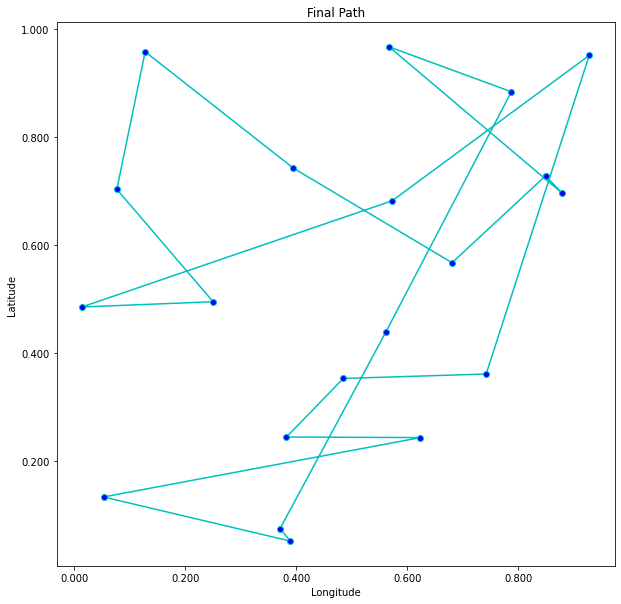

In [18]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([SA_nodes, [SA_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]
ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.set_xlabel("Iteration")
ax.set_ylabel("Distance")
# ax[0].title.set_text("Distance vs Iterations")
# ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
#            marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()

### ACA Graphs

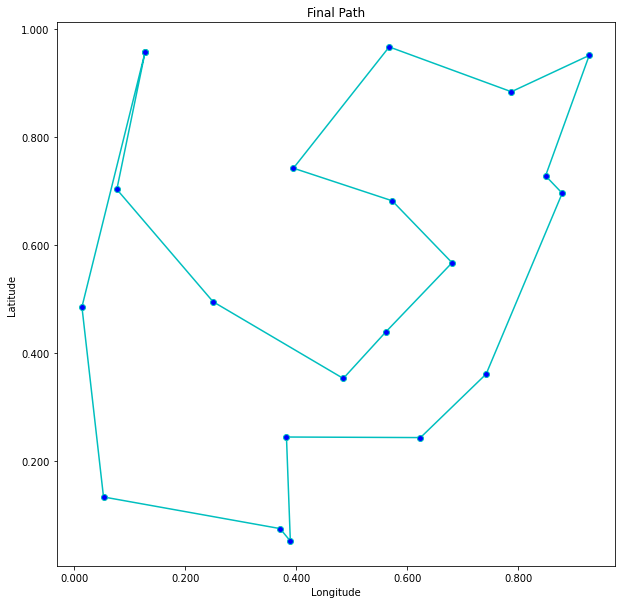

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([ACA_nodes, [ACA_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]

ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()

### ALR Graphs

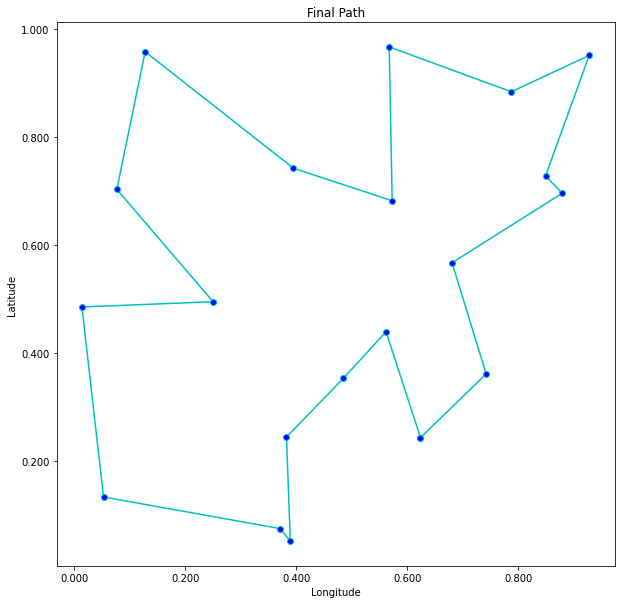

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([ALR_nodes, [ALR_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]

ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()

In [21]:
# np.save("data_that_makes_nn_look_really_good.npy", points_coordinates)